# Titanic Survival Prediction
The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

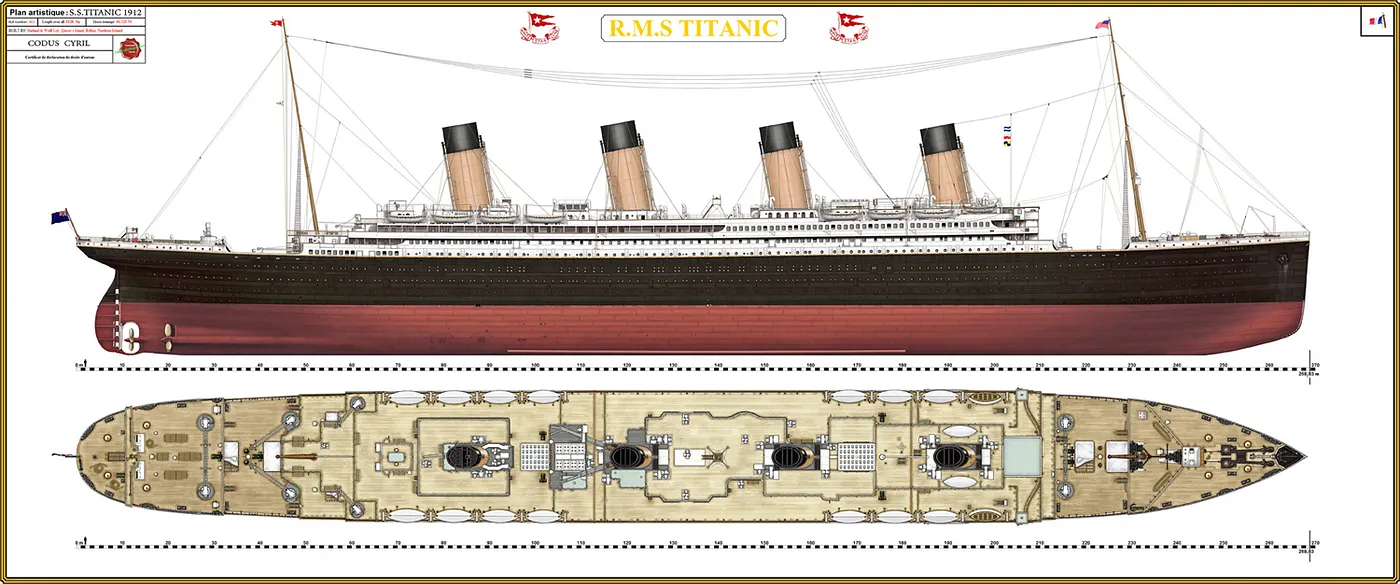

With the help of this dataset we need to find the survived rate i.e. whether a person on the ship has survived or not. 

# 1. Importing the packages and libraries 
lets load the required packages and libraries for data analysis

In [3]:
import numpy as np 
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Reading and Exploring data 
importing the training and test datasets

In [4]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [5]:
#lets take a look at our training data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Now the test dataset
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Conclusion:** The train data has survived column whereas in the test data it is missing which we need to find.

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


__Conclusion:__ From the info we can see that it has 891 rows and 12 columns with data of int64, float64 and object type. 

# 3. Data analysis
Getting instances from our data

In [8]:
#all the columns in our training dataset
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Conclusion:** We have diffrent features of data here:
- Categorical : Pclass, Sex, Embarked, Survived
- Continuous : Age, Fare, Sibsp, Parch, PassengerId
- Alphanumeric: Ticket, Cabin, Name

In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Conclusion:** 
- 891 Passengers in total
- 38% in average are survived 
- Most of the people are from PClass 3
- The average age of the passengers are 29
- Fare column have a huge variation of 49 and max fare paid is 512

In [8]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Conclusion:** 
- the Sex column have two unique values 
- Cabin and ticket columns have lots of duplicates
- the Embarked column has three values with most passengers embraked from 'S'

In [11]:
#Finding the percantage of missing values in train dataset
train_df.isnull().sum()/ len(train_df) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [12]:
#Finding the percentage of Null values in test dataset
test_df.isnull().sum()/ len(test_df) *100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

**Conclusion:** As we can see the Age column and Embarked column are missing values that we will need to fill. We are going to drop the Cabin column as it has 77% and 78% of missing values in Train and test dataset respectively.

# 4. Visula Data analyis 

male      577
female    314
Name: Sex, dtype: int64

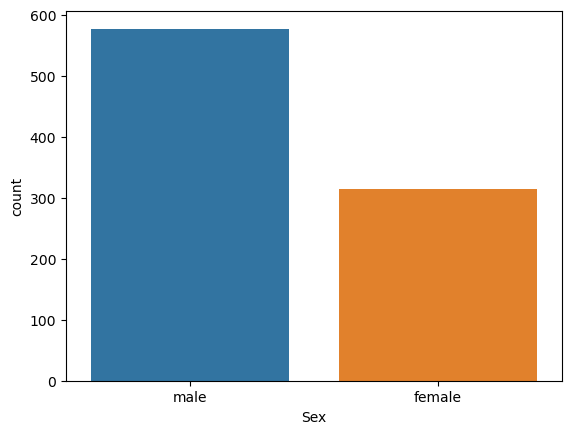

In [11]:
#sex feature
sns.countplot(x='Sex', data=train_df)
train_df['Sex'].value_counts()

**Conclusion:** No. of Males on the ship are more in comparison to Females

,Sex,Survived
0,female,0.742038
1,male,0.188908


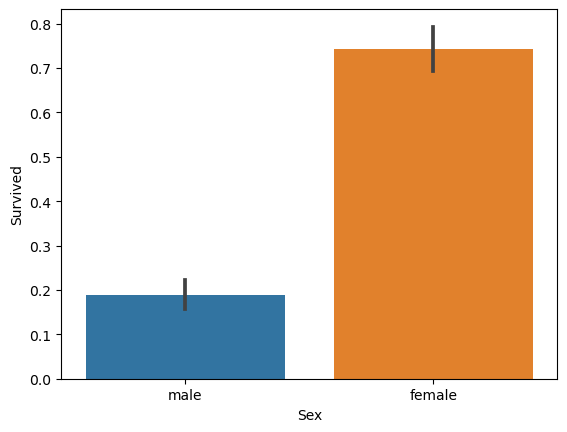

In [12]:
#Comparing the Sex feature against Survived
sns.barplot(x='Sex',y='Survived',data=train_df)
train_df.groupby('Sex',as_index=False).Survived.mean()

**Conclusion:** No. of Females survived are much more than the no. of Males on the ship.

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


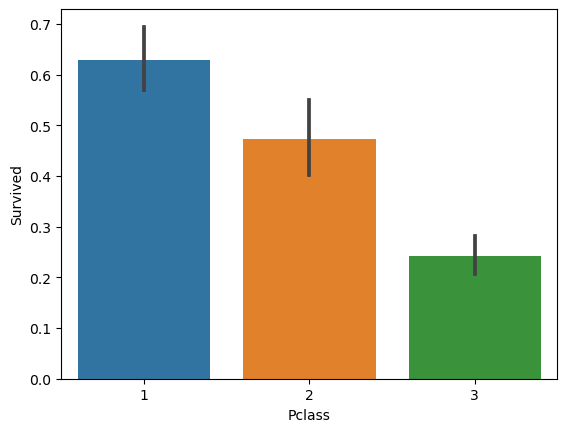

In [13]:
#Comparing the Pclass feature against Survived
sns.barplot(x='Pclass',y='Survived',data=train_df)
train_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

**Conclusion:** Clearly Class had an effect on survival of each passenger. Thus, belonging to Pclass 1 had a huge advantage.

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


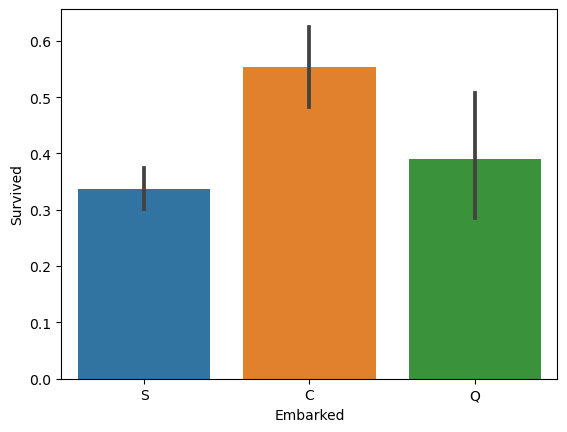

In [14]:
#Comparing the Embarked feature against Survived
sns.barplot(x='Embarked',y='Survived',data=train_df)
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

**Conclusion:** the passengers that embarked from port 'C' had a higher rate of Survival at 55%. 

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


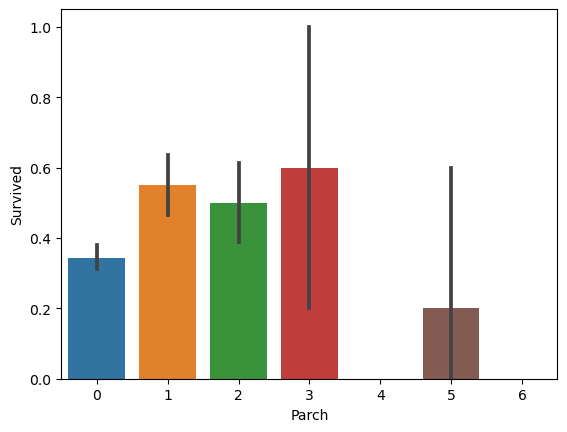

In [15]:
#Comparing the Parent-Child feature against Survived
sns.barplot(x='Parch',y='Survived',data=train_df)
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

**Conclusion:** The passengers having either 1,2 or 3 children have high rate of surviving. However having more than 3 children makes the possiblity even less. 

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


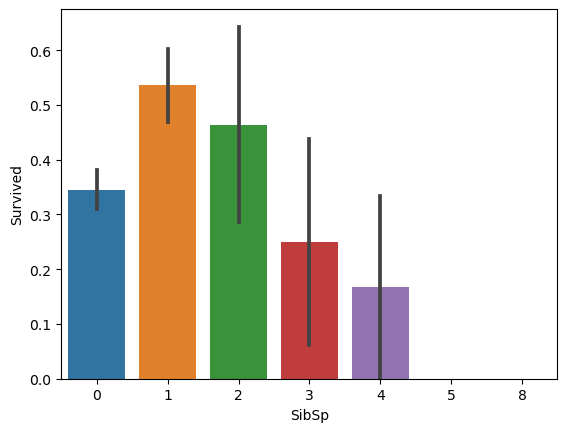

In [16]:
#Comparing the Sibling-Spouse feature against Survived
sns.barplot(x='SibSp',y='Survived',data=train_df)
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

**Conclusion:** Having a spouse or 1 sibling had a positive effect on Survival as compared to being alone. 

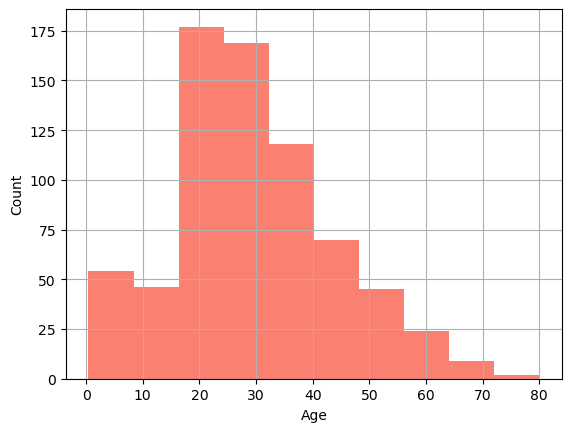

The Median age of passengers is : 28
The Standard Deviation age of passengers is : 14


In [17]:
train_df.Age.hist(bins=10,color='salmon')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print("The Median age of passengers is :", int(train_df.Age.median()))
print("The Standard Deviation age of passengers is :", int(train_df.Age.std()))

**Conclusion:** Taking look at the median it clearly shows that the younger individuals are more likely to survive on the ship.(Ignoring the missing/null values)

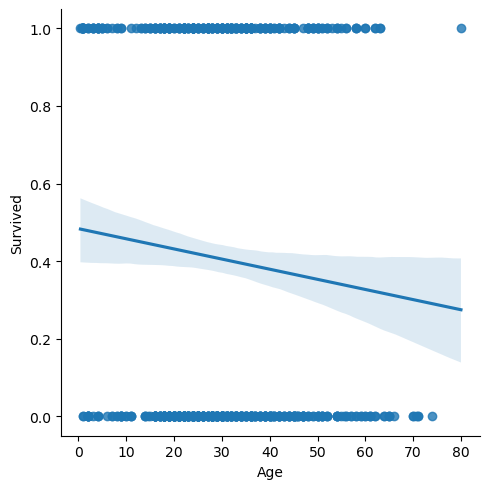

In [18]:
sns.lmplot(x='Age',y='Survived',data=train_df,palette='Set1')

**Conclusion:** showing the survived graph of individuals based on age

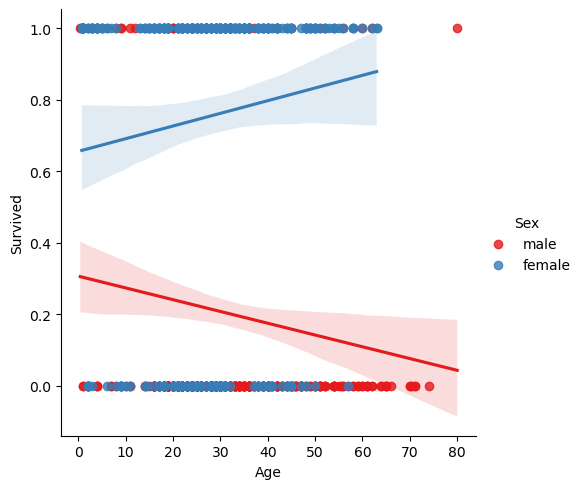

In [19]:
sns.lmplot(x='Age',y='Survived',data=train_df,hue='Sex',palette='Set1')

**Conclusion:** Age has an opposite effect on the survival in men and women. The chances of survival increase as the age of women increases.

,Sex,Age
0,female,27.0
1,male,29.0


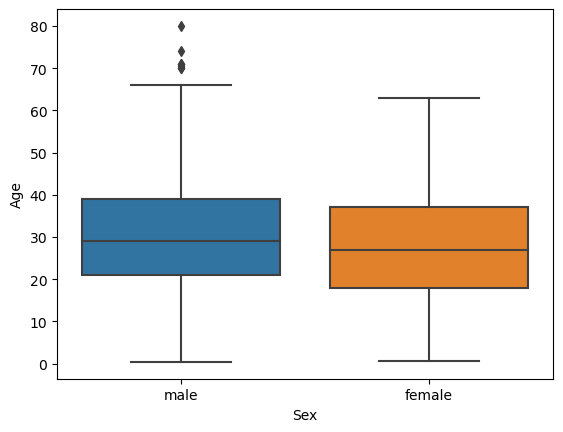

In [20]:
#Checking for outliers in Age data
sns.boxplot(x='Sex',y='Age',data=train_df)

#getting the median age according to Sex
train_df.groupby('Sex',as_index=False)['Age'].median()

Mean value of Fare is : 32.204207968574636
Median value of Fare is : 14.4542


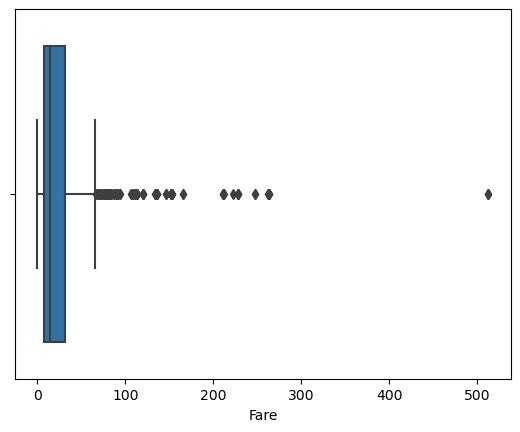

In [22]:
#plotting the Fare column to see the spread of data
sns.boxplot(x="Fare", data=train_df)

#Checking the mean and median values
print("Mean value of Fare is :",train_df.Fare.mean())
print("Median value of Fare is :",train_df.Fare.median())

# 5. Data Cleaning
Now proceed to fill in the NaN values in our test and train datasets and drop the columns that we are not require.

In [13]:
#dropping the coulmns that are not needed
drop_list=['Cabin','Ticket','PassengerId']

train_df = train_df.drop(drop_list,axis=1)
test_passenger_df = pd.DataFrame(test_df.PassengerId)
test_df = test_df.drop(drop_list,axis=1)

test_passenger_df.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


Filling the missing value in embarked column. Most people embarked on their journey from 'S' port. Hence, we will be filling the two missing values with "S"

In [14]:
#filling the missing Embarked values in train and test datasets
train_df.Embarked.fillna('S',inplace=True)

We will replace the NaN values in the age column with the median age that we calculated earlier.

In [ ]:
#filling the missing values in the Age column
train_df.Age.fillna(28, inplace=True)
test_df.Age.fillna(28, inplace=True)

Filling the null values in fare column with median of the data as it has many outliers. 

In [16]:
#Filling the null Fare values in test dataset
test_df.Fare.fillna(test_df.Fare.median(), inplace=True)

# 6. Feature engineering 

The name column might not be useful to us directly but a lot of names have titles like Mr, Mrs, Lady, etc which might indicate the individual's status in the society which can affect the chance of survival.

We shall try to extract a Title feature form the name column which might improve the performance of our model.

In [37]:
#combining train and test dataframes to work with them simultaneously
Combined_data = [train_df, test_df]

<Axes: xlabel='count', ylabel='Title'>

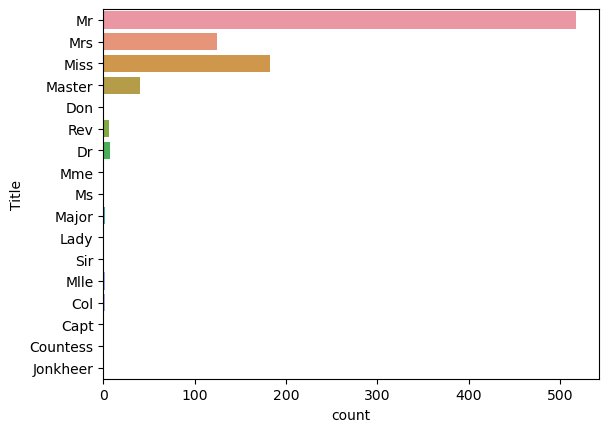

In [38]:
#extracting the various title in Names column
for dataset in Combined_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

#Plotting the various titles extracted from the names    
sns.countplot(y='Title',data=train_df) 

There are some titles that are very rare like Capt and Lady. It would be better to group such titles under one name know as 'rare'. Some titles also seem to be incorrectly spelled. They also need to be rectified.

In [39]:
#Refining the title feature by merging some titles
for dataset in Combined_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special')

    dataset['Title'] = dataset['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})
    
train_df.groupby('Title',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Special,0.347826
2,Mr,0.156673


<Axes: xlabel='count', ylabel='Title'>

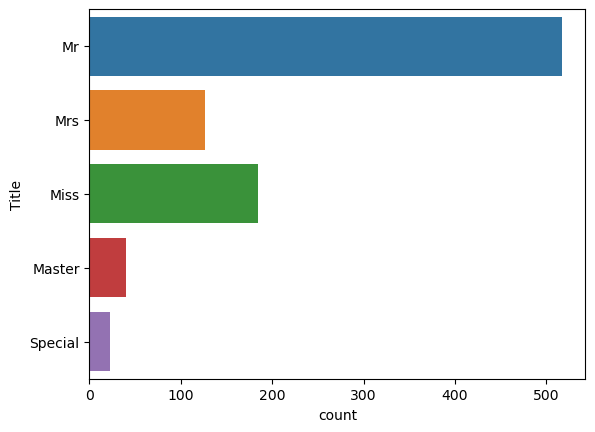

In [40]:
#Now lets see the distribution of the title feature
sns.countplot(y='Title',data=train_df)

In [41]:
#Mapping the title names to numeric values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Special": 5}
for dataset in Combined_data:
    dataset['Title'] = dataset.Title.map(title_mapping)
    dataset['Title'] = dataset.Title.fillna(0)

As we visulaized from our data visualization being alone on the titanic had a disadvantage when it came to survival so
we will create a feature IsAlone which depends on the number of family members that can be calculated from the Parch and SibSp columns

In [42]:
#Creating a new feature IsAlone from the SibSp and Parch columns
for dataset in Combined_data:
    dataset["Family"] = dataset['SibSp'] + dataset['Parch']
    dataset["IsAlone"] = np.where(dataset["Family"] > 0, 0,1)
    dataset.drop('Family',axis=1,inplace=True)
train_df.head()  

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone,IsMinor,Old_Female,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,0,0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,0,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,0,0,1


In [43]:
#dropping the Name,SibSP and Parch columns
for dataset in Combined_data:
    dataset.drop(['SibSp','Parch','Name'],axis=1,inplace=True)  

Dropped the column which we do not need furthur

<br><br><br>
Since Age had big role to play when it came to survival. Clearly younger people were more likely to survive. Hence, it should be worth considering a feature IsMinor for the passengers under the age of 15.

In [44]:
#Creating another feature if the passenger is a child
for dataset in Combined_data:
    dataset["IsMinor"] = np.where(dataset["Age"] < 15, 1, 0)

Older female passengers also had a higher chance of survival. Let's create a feature name Old_female that would account for women older tha 50 years on board.

In [45]:
train_df['Old_Female'] = (train_df['Age']>50)&(train_df['Sex']=='female')
train_df['Old_Female'] = train_df['Old_Female'].astype(int)

test_df['Old_Female'] = (test_df['Age']>50)&(test_df['Sex']=='female')
test_df['Old_Female'] = test_df['Old_Female'].astype(int)

Pclass, Sex and Embarked are the categorical features in our data. we can convert these categorucal variables into dummy variables using the get_dummies method in python

In [46]:
#Converting categorical variables into numerical ones
train_df2 = pd.get_dummies(train_df,columns=['Pclass','Sex','Embarked'],drop_first=True)
test_df2 = pd.get_dummies(test_df,columns=['Pclass','Sex','Embarked'],drop_first=True)
train_df2.head()

,Survived,Age,Fare,IsAlone,IsMinor,Old_Female,Title,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,0,1,0,1,1,0,1
1,1,38.0,71.2833,0,0,0,3,0,0,0,0,0
2,1,26.0,7.9250,1,0,0,2,0,1,0,0,1
3,1,35.0,53.1000,0,0,0,3,0,0,0,0,1
4,0,35.0,8.0500,1,0,0,1,0,1,1,0,1


Age and Fare columns have continuous data and there might be fluctuations that do not reflect patterns in the data, which might be noise. That's why we will put people that are within a certain range of age or fare in the same bin. This can be achieved using qcut method in pandas

In [47]:
#creating Age bands
train_df2['AgeBands'] = pd.qcut(train_df2.Age,4,labels=False) 
test_df2['AgeBands'] = pd.qcut(test_df2.Age,4,labels=False) 


In [48]:
#creating Fare bands
train_df2['FareBand'] = pd.qcut(train_df2.Fare,7,labels=False)
test_df2['FareBand'] = pd.qcut(test_df2.Fare,7,labels=False)


In [49]:
#Dropping the Age and Fare columns
train_df2.drop(['Age','Fare'],axis=1,inplace=True)
test_df2.drop(['Age','Fare'],axis=1,inplace=True)

In [50]:
train_df2.head()
#sns.barplot('AgeBands','Survived',data=train_df2)

,Survived,IsAlone,IsMinor,Old_Female,Title,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands,FareBand
0,0,0,0,0,1,0,1,1,0,1,0,0
1,1,0,0,0,3,0,0,0,0,0,3,6
2,1,1,0,0,2,0,1,0,0,1,1,1
3,1,0,0,0,3,0,0,0,0,1,2,5
4,0,1,0,0,1,0,1,1,0,1,2,1


In [51]:
test_df2.head()

,IsAlone,IsMinor,Old_Female,Title,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands,FareBand
0,1,0,0,1,0,1,1,1,0,2,1
1,0,0,0,3,0,1,0,0,1,3,0
2,1,0,0,1,1,0,1,1,0,3,2
3,1,0,0,1,0,1,1,0,1,1,2
4,0,0,0,3,0,1,0,0,1,0,2


# 7. Machine Learning 
In this we will try out some different ML models to see which gives us the best result. 
<br> 
The process will be as follows:
- Importing the required libraries from scikit learn.
- Splitting out training data into train and test datasets.
- Try out different models to see which fits the best.

In [52]:
#importing the required ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [53]:
#Splitting out training data into X: features and y: target
X = train_df2.drop("Survived",axis=1) 
y = train_df2["Survived"]

#splitting our training data again in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [54]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_logreg

80.6

In [55]:
#let's perform some K-fold cross validation for logistic Regression
cv_scores = cross_val_score(logreg,X,y,cv=5)
 
np.mean(cv_scores)*100

80.35904839620865

**Conclusion:** Our score also depends on how we had split our training data using train_test_split. We had performed k-fold cross validation with k=5 to get a more accurate score. 

In [56]:
#Decision Tree Classifier

decisiontree = DecisionTreeClassifier()
dep = np.arange(1,10)
param_grid = {'max_depth' : dep}

clf_cv = GridSearchCV(decisiontree, param_grid=param_grid, cv=5)

clf_cv.fit(X, y)
clf_cv.best_params_,clf_cv.best_score_*100
print('Best value of max_depth:',clf_cv.best_params_)
print('Best score:',clf_cv.best_score_*100)

Best value of max_depth: {'max_depth': 4}
Best score: 82.37838177138912


In [57]:
#Random Forest CLassifier

random_forest = RandomForestClassifier()
ne = np.arange(1,20)
param_grid = {'n_estimators' : ne}

rf_cv = GridSearchCV(random_forest, param_grid=param_grid, cv=5)

rf_cv.fit(X, y)
print('Best value of n_estimators:',rf_cv.best_params_)
print('Best score:',rf_cv.best_score_*100)

Best value of n_estimators: {'n_estimators': 11}
Best score: 79.57190383528967


In [60]:
#GradientBoostingClassifier
gbk = GradientBoostingClassifier()
ne = np.arange(1,20)
dep = np.arange(1,10)
param_grid = {'n_estimators' : ne,'max_depth' : dep}

gbk_cv = GridSearchCV(gbk, param_grid=param_grid, cv=5)

gbk_cv.fit(X, y)
print('Best value of parameters:',gbk_cv.best_params_)
print('Best score:',gbk_cv.best_score_*100)

Best value of parameters: {'max_depth': 3, 'n_estimators': 16}
Best score: 82.26476680685457


Since the Logistic Regression has the best accuracy so we will procedd with it only. <br><br>
we will create a new dataframe submission which have only two columns PassengerID and Survived, from which we can calculate the percentage of people survived.

In [62]:
y_final = clf_cv.predict(test_df2)

submission = pd.DataFrame({
        "PassengerId": test_passenger_df["PassengerId"],
        "Survived": y_final
    })
submission.head()
submission.to_csv('titanic.csv', index=False)

In [70]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [88]:
submission.Survived.sum()

145

In [96]:
(submission['Survived'].count())

418

In [74]:
submission.Survived.mean()

0.34688995215311

In [90]:
alive_percentage=((submission['Survived'].sum())/(submission['Survived'].count()))*100
alive_percentage

34.688995215311

In [83]:
submission.groupby('Survived').apply(len)

Survived
0    273
1    145
dtype: int64

# Result 
From the final submission file we can conclude that:
- Total no. of passengers on the ship was 418 
- no. of people survived are 273 
- no. of people died are 145 
- mean of survived are 0.346 
- alive percentage is 34%
